In [20]:
import os
import os.path as osp
import json
import numpy as np

import matplotlib.pyplot as plt 
from radar_dataclass import *
from natsort import natsorted

In [21]:
RADAR_DATA_DIR = '../radar/json/'

radar_file_path_list = [osp.join(RADAR_DATA_DIR, path) for path in natsorted(os.listdir(RADAR_DATA_DIR)) if path.endswith('json')]

In [22]:
test_sample = radar_file_path_list[1]

In [23]:
with open(test_sample, 'r') as file:
    data_dict = json.load(file)

In [24]:
adc_data = adcStruct(**{keys: data_dict['adcStruct'][keys] for keys in data_dict['adcStruct']})

bv_data = beamVectorStruct(**{keys: data_dict['beamVectorStruct'][keys] for keys in data_dict['beamVectorStruct']})

tLVHeaders = [TLVHeader(**tlv) for tlv in data_dict['frameHeader']['tLVHeaderlsit']]
frame_data = frameHeader(**{key: data_dict['frameHeader'][key] for key in data_dict['frameHeader'] if key != 'tLVHeaderlsit'}, tLVHeaderlist=tLVHeaders)

hrrp_data = hrrpStruct(data_dict['hrrp'])

rd_data = rangeDopplerStruct(data_dict['rangeDoppler'])

ra_data = rangeAngleStruct(**{keys: data_dict['rangeAngle'][keys] for keys in data_dict['rangeAngle']})

det_data = detPointsStruct([detections(**item) for item in data_dict['detPoints']])

trk_data = trackStruct([tracks(**item) for item in data_dict['track']])

In [34]:
data_dict['detPoints']

[{'angle': 21.49340057373047,
  'doppler': 28.265625,
  'dopplerIdx': 312,
  'peakVal': 4536.0,
  'range': 9.703125,
  'rangeIdx': 10,
  'snr': 1098.0},
 {'angle': 21.298091888427734,
  'doppler': 28.25,
  'dopplerIdx': 316,
  'peakVal': 4374.0,
  'range': 10.5,
  'rangeIdx': 10,
  'snr': 936.0},
 {'angle': 21.474607467651367,
  'doppler': 28.546875,
  'dopplerIdx': 319,
  'peakVal': 4398.0,
  'range': 10.546875,
  'rangeIdx': 10,
  'snr': 954.0},
 {'angle': 21.59867286682129,
  'doppler': 28.96875,
  'dopplerIdx': 322,
  'peakVal': 4152.0,
  'range': 10.4375,
  'rangeIdx': 10,
  'snr': 708.0},
 {'angle': 21.51595115661621,
  'doppler': 29.03125,
  'dopplerIdx': 324,
  'peakVal': 4248.0,
  'range': 10.59375,
  'rangeIdx': 10,
  'snr': 810.0},
 {'angle': -5.924072742462158,
  'doppler': 29.5625,
  'dopplerIdx': 329,
  'peakVal': 4152.0,
  'range': 10.625,
  'rangeIdx': 10,
  'snr': 708.0},
 {'angle': -23.225326538085938,
  'doppler': -28.109375,
  'dopplerIdx': 69,
  'peakVal': 4080.0,


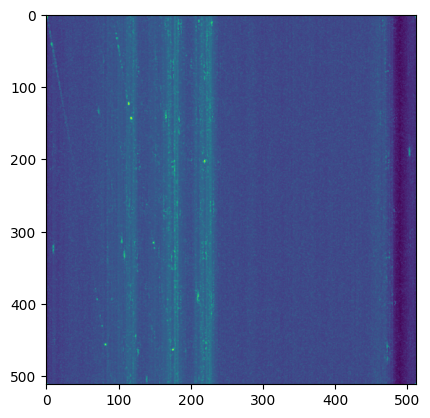

In [26]:
plt.imshow(np.array([item['data'] for item in rd_data.rangeDoppler]).reshape(512, -1).T)